In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
import tensorflow as tf

2023-04-22 22:55:26.663017: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Preprocessing

###### Import the crypto dataset

In [3]:
cryptoData = pd.read_csv('dataset.csv')
cryptoData.head()

Unnamed: 0        open        high         low       close  volume  \
0           0  112.900002  118.800003  107.142998  115.910004     0.0   
1           1    3.493130    3.692460    3.346060    3.590890     0.0   
2           2  115.980003  124.663002  106.639999  112.300003     0.0   
3           3    3.594220    3.781020    3.116020    3.371250     0.0   
4           4  112.250000  113.444000   97.699997  111.500000     0.0   

      marketCap                 timestamp crypto_name        date  
0  1.288693e+09  2013-05-05T23:59:59.999Z     Bitcoin  2013-05-05  
1  6.229819e+07  2013-05-05T23:59:59.999Z    Litecoin  2013-05-05  
2  1.249023e+09  2013-05-06T23:59:59.999Z     Bitcoin  2013-05-06  
3  5.859436e+07  2013-05-06T23:59:59.999Z    Litecoin  2013-05-06  
4  1.240594e+09  2013-05-07T23:59:59.999Z     Bitcoin  2013-05-07

Set the index of cryptoData to be the date column of the DataFrame converted to a datetime format.

In [4]:
cryptoData.index = pd.to_datetime(cryptoData.date)

Check whether there is any null values in the data set

In [5]:
cryptoData.isnull().values.any()

False

Remove the first 629 dataset as they have 0 volume

In [6]:
cryptoData.drop(cryptoData.index[0:629],inplace=True)
cryptoData.head()

Unnamed: 0        open        high         low       close  \
date                                                                     
2013-12-27         629  763.280029  777.510010  713.599976  735.070007   
2013-12-27         630   24.806601   25.269100   22.263599   23.272301   
2013-12-27         631    0.000603    0.000628    0.000497    0.000522   
2013-12-27         632    0.024426    0.027123    0.023527    0.027076   
2013-12-28         633    0.027554    0.028106    0.026629    0.027303   

                volume     marketCap                 timestamp crypto_name  \
date                                                                         
2013-12-27  46862700.0  8.955395e+09  2013-12-27T23:59:59.999Z     Bitcoin   
2013-12-27  31112200.0  5.660880e+08  2013-12-27T23:59:59.999Z    Litecoin   
2013-12-27    477422.0  8.016604e+06  2013-12-27T23:59:59.999Z    Dogecoin   
2013-12-27    148422.0  2.116741e+08  2013-12-27T23:59:59.999Z         XRP   
2013-12-28    143404.0  2.134534e+08  2013-12-28T23:59:59.999Z         XRP   

                  date  
date                    
2013-12-27  2013-12-27  
2013-12-27  2013-12-27  
2013-12-27  2013-12-27  
2013-12-27  2013-12-27  
2013-12-28  2013-12-28

In [7]:
cryptoData.size

723170

Extract only the Bitcoin data since we only want to predict the Bitcoin values

In [8]:
bitcoinData = cryptoData[cryptoData.crypto_name == "Bitcoin"]

Delete unnecessary data columns such as the crypto_name, index and timestamp

In [9]:
del bitcoinData["crypto_name"]
del bitcoinData["Unnamed: 0"]
del bitcoinData["timestamp"]
bitcoinData.head()

open        high         low       close      volume  \
date                                                                     
2013-12-27  763.280029  777.510010  713.599976  735.070007  46862700.0   
2013-12-28  737.979980  747.059998  705.349976  727.830017  32505800.0   
2013-12-29  728.049988  748.609985  714.440002  745.049988  19011300.0   
2013-12-30  741.349976  766.599976  740.239990  756.130005  20707700.0   
2013-12-31  760.320007  760.580017  738.169983  754.010010  20897300.0   

               marketCap        date  
date                                  
2013-12-27  8.955395e+09  2013-12-27  
2013-12-28  8.869919e+09  2013-12-28  
2013-12-29  9.082104e+09  2013-12-29  
2013-12-30  9.217168e+09  2013-12-30  
2013-12-31  9.191325e+09  2013-12-31

Check all the available columns now

In [10]:
bitcoinData.columns

Index(['open', 'high', 'low', 'close', 'volume', 'marketCap', 'date'], dtype='object')

Check the size after some data has been removed

In [11]:
bitcoinData.size

21084

Filter the dataframe to a specific range, specifically from 2016 to 2022 to get the newer information

In [12]:
bitcoinData['date'] = pd.to_datetime(bitcoinData['date'])

# Filter the dataframe by a specific date range
start_date = '2016-01-01'
end_date = '2022-10-31'
bitcoinData = bitcoinData[(bitcoinData['date'] >= start_date) & (bitcoinData['date'] <= end_date)]

/var/folders/dy/vm9pt3cx70s62r9phy72dp9r0000gn/T/ipykernel_80774/3981590092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoinData['date'] = pd.to_datetime(bitcoinData['date'])


In [13]:
bitcoinData.head()

open        high         low       close      volume  \
date                                                                     
2016-01-01  430.721008  436.246002  427.515015  434.334015  36278900.0   
2016-01-02  434.622009  436.062012  431.869995  433.437988  30096600.0   
2016-01-03  433.578003  433.743011  424.705994  430.010986  39633800.0   
2016-01-04  430.061005  434.516998  429.084015  433.091003  38477500.0   
2016-01-05  433.069000  434.182007  429.675995  431.959991  34522600.0   

               marketCap       date  
date                                 
2016-01-01  6.529300e+09 2016-01-01  
2016-01-02  6.517390e+09 2016-01-02  
2016-01-03  6.467430e+09 2016-01-03  
2016-01-04  6.515713e+09 2016-01-04  
2016-01-05  6.500393e+09 2016-01-05

Feature engineering; Create new variables such as Tomorrow which will be used in the future code

In [14]:
bitcoinData["Tomorrow"] = bitcoinData["close"].shift(-1)
bitcoinData["Target"] = (bitcoinData["Tomorrow"] > bitcoinData["close"]).astype(int)
bitcoinData.head()

open        high         low       close      volume  \
date                                                                     
2016-01-01  430.721008  436.246002  427.515015  434.334015  36278900.0   
2016-01-02  434.622009  436.062012  431.869995  433.437988  30096600.0   
2016-01-03  433.578003  433.743011  424.705994  430.010986  39633800.0   
2016-01-04  430.061005  434.516998  429.084015  433.091003  38477500.0   
2016-01-05  433.069000  434.182007  429.675995  431.959991  34522600.0   

               marketCap       date    Tomorrow  Target  
date                                                     
2016-01-01  6.529300e+09 2016-01-01  433.437988       0  
2016-01-02  6.517390e+09 2016-01-02  430.010986       0  
2016-01-03  6.467430e+09 2016-01-03  433.091003       1  
2016-01-04  6.515713e+09 2016-01-04  431.959991       0  
2016-01-05  6.500393e+09 2016-01-05  429.105011       0

Statistical Analysis: find mean, median per year and plot

              mean        median
year                            
2016    568.492407    582.556000
2017   4006.033629   2589.409912
2018   7572.298943   6906.919922
2019   7392.660267   7823.127461
2020  11063.188379   9713.494443
2021  47437.280257  47945.056832
2022  34743.954987  38425.680746


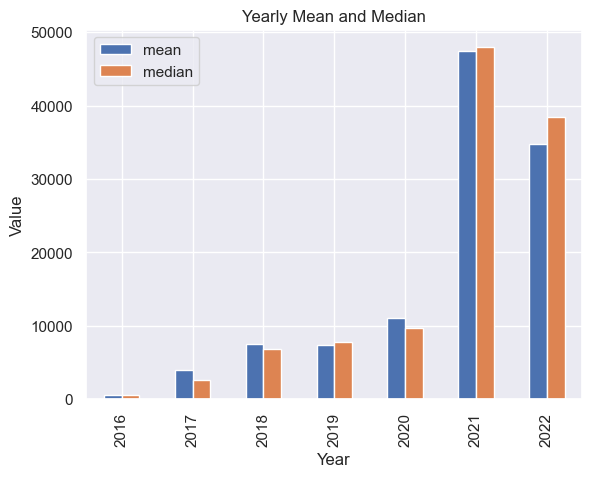

In [15]:
# group the DataFrame by year and calculate the mean and median for each group
bitcoinData['year'] = bitcoinData['date'].dt.year
yearly_stats = bitcoinData.groupby('year')['close'].agg(['mean', 'median'])
print(yearly_stats)

# plot the yearly mean and median values
yearly_stats.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Yearly Mean and Median')
plt.show()

The boxplot for the closing value of Bitcoin from 2016 to 2022

<Axes: xlabel='close'>

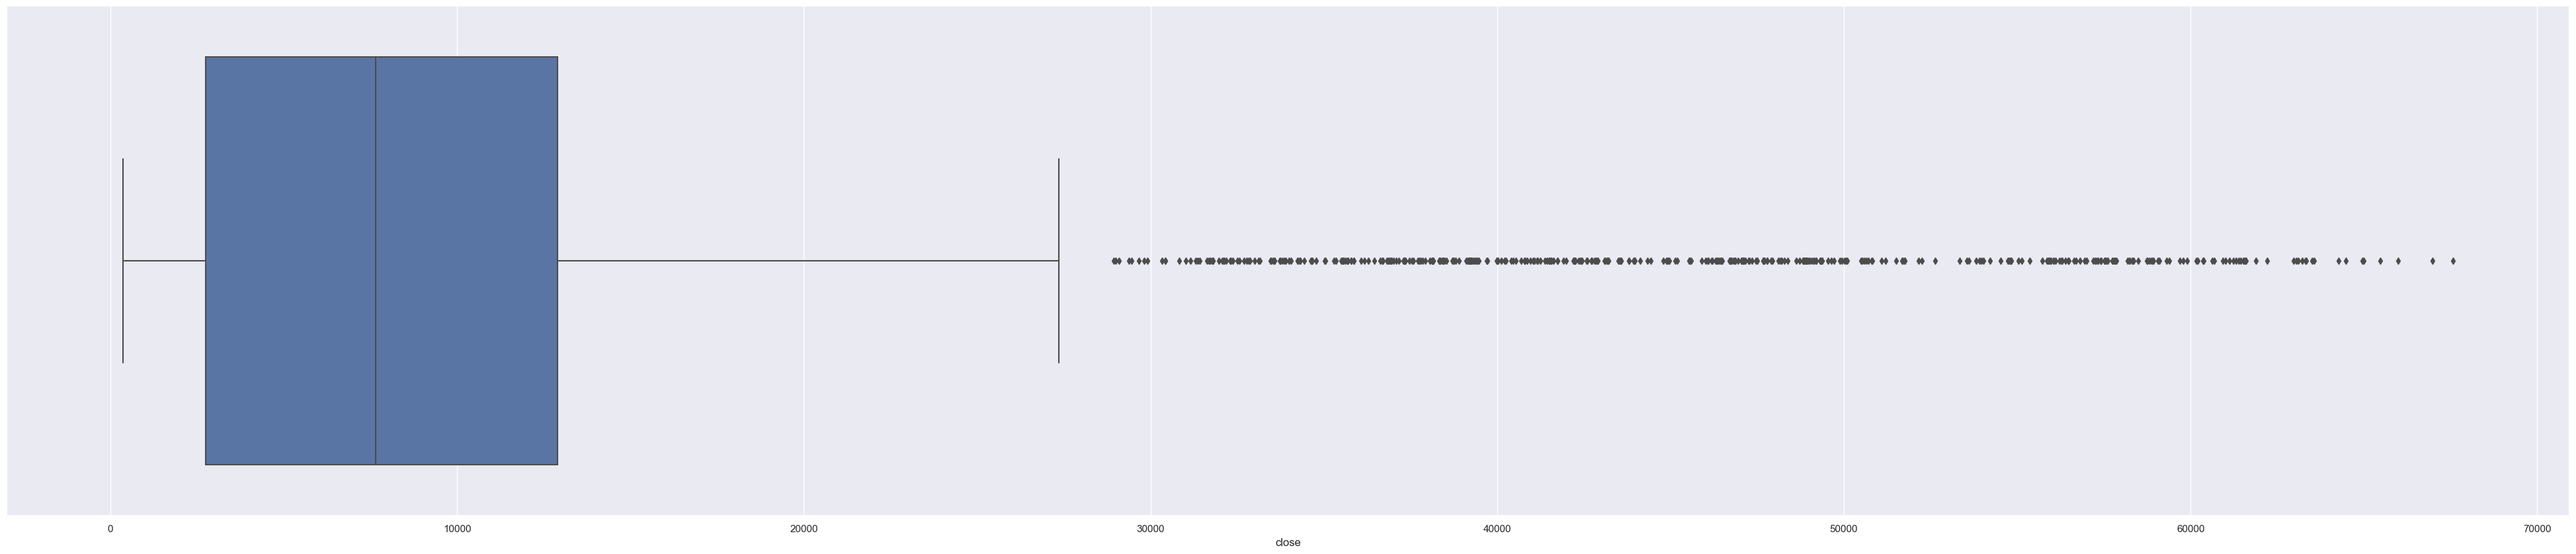

In [16]:
f = plt.figure(figsize=(50, 10))
sb.boxplot(data = bitcoinData, x= "close", orient = "h")

There are many outliers as shown in the box plot but this is simply due to the difference between the prices over the years so we should not remove the outliers.

Plot the Bitcoin price over time from 2016 to 2022

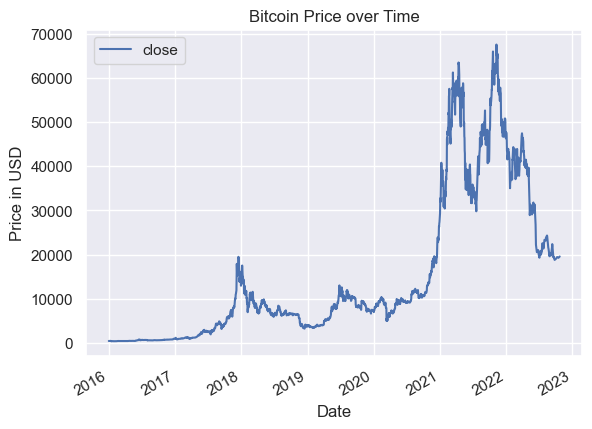

In [17]:
bitcoinData.plot.line(x="date", y="close", use_index="True")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.title("Bitcoin Price over Time")
plt.show()

### Machine Learning

###### Random Forest Classifier Model

Use Random Forest Classifier for train test
Initialise an instance of the RandomForestClassifier class with 200 decision trees, a minimum sample split of 100, and a random seed of 1.
Use train_test_split function to split the bitcoinData DataFrame into a training set and a test set, with a test size of 0.2.
The predictors list contains the column names that will be used to predict the target variable.
The target_col variable contains the name of the target variable column.

Then, the model is trained on the training set by calling the fit method with the training data and the corresponding target values.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

model = RandomForestClassifier(n_estimators=200, min_samples_split=100, random_state=1)

train, test = train_test_split(bitcoinData, test_size=0.2, random_state=1, shuffle=False)

predictors = ["close", "volume", "open", "high", "low"]
target_col = "Target"
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

Use the trained RandomForestClassifier model to make predictions on the test data, and then computing the precision score to evaluate the performance of the model.
The model.predict method predicts the target variable for the test set using the specified predictors. The resulting predictions are then converted to a pandas Series object.
The precision_score function computes the precision score of the model predictions. It measures the proportion of true positive predictions out of all positive predictions made by the model.

In [19]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.49336283185840707

The predict function fits the model to the training data using the predictors list of column names and the target column specified in the target_col variable. It then uses the fitted model to predict the target variable on the test data using the predict method of the model.

The predictions are then converted and returned with the test data as a concatenated pandas dataframe that contains the target variable and the predicted values for each observation in the test data.

In [20]:
def predict(train, test, predictors, model, target_col):
    model.fit(train[predictors], train[target_col])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test[target_col], preds], axis=1)
    return combined

Backtest is a helper function that uses the predict function to generate predictions on a rolling basis. The function is used to evaluate the performance of a machine learning model on a historical dataset by testing it on a rolling basis. If no predictions were made, the function returns an empty dataframe. Otherwise, the function concatenates all the predictions generated by the predict function and returns a dataframe with the target variable and the predictions.

In [21]:
def backtest(data, model, predictors, target_col, start=1250, step=250):
    
    data = data.dropna()
    data = data.replace([np.inf, -np.inf], np.nan)
    data = data.dropna()
    
    all_predictions = []
    pred_col = "Predictions"
    cols = [target_col, pred_col]

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        predictions = predict(train, test, predictors, model, target_col) # pass target_col here
        all_predictions.append(predictions)

    if len(all_predictions) == 0:  # no predictions made
        return pd.DataFrame(columns=cols)

    return pd.concat(all_predictions)[cols]

We then evaluate its performance. We use the value_counts() method on the "Predictions" column of the predictions DataFrame to count the number of occurrences of each predicted value to evaluate the accuracy and distribution of the model's predictions.

In [22]:
predictions = backtest(bitcoinData, model, predictors, target_col="Target")

In [23]:
predictions["Predictions"].value_counts()

0    648
1    378
Name: Predictions, dtype: int64

We then calculate the precision score of the predictions made.

In [24]:
precision = precision_score(predictions[target_col], predictions["Predictions"])
print(f"Precision: {precision}")

Precision: 0.4947089947089947


Using the value_counts() method on the "Target" column of the target DataFrame to count the number of occurrences of each predicted value to evaluate the accuracy and distribution of the model's predictions. By dividing the count of each class by the total number of instances, this code gives the class distribution in the predictions, which can be useful for understanding whether the model is biased towards one class or if it is making balanced predictions.

In [25]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.515595
0    0.484405
Name: Target, dtype: float64

In [26]:
bitcoinData['ma_7'] = bitcoinData['close'].rolling(window=7).mean()

In [27]:
bitcoinData['ma_15'] = bitcoinData['close'].rolling(window=15).mean()

In [28]:
bitcoinData['ma_30'] = bitcoinData['close'].rolling(window=30).mean()

In [29]:
bitcoinData['ma_60'] = bitcoinData['close'].rolling(window=60).mean()

In [30]:
bitcoinData['ma_90'] = bitcoinData['close'].rolling(window=90).mean()

In [31]:
bitcoinData['ma_100'] = bitcoinData['close'].rolling(window=100).mean()

In [32]:
bitcoinData = bitcoinData.dropna()
bitcoinData = bitcoinData.replace([np.inf, -np.inf], np.nan)
bitcoinData = bitcoinData.dropna()

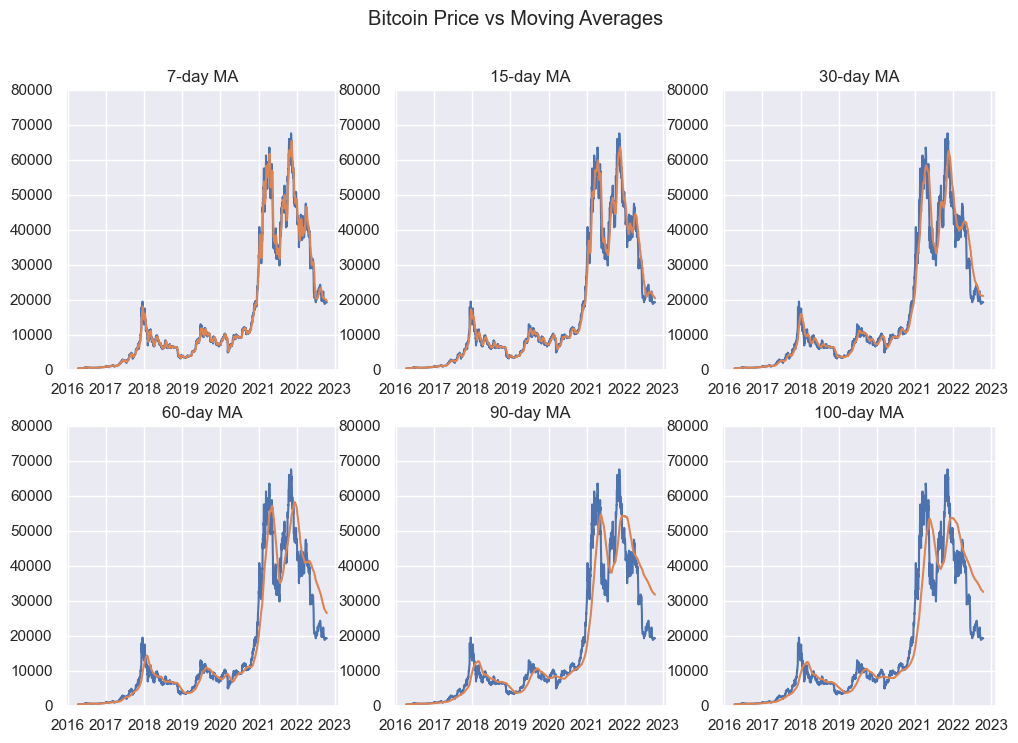

In [33]:
# create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# plot bitcoin price against each moving average
axs[0, 0].plot(bitcoinData['close'])
axs[0, 0].plot(bitcoinData['ma_7'])
axs[0, 0].set_title('7-day MA')

axs[0, 1].plot(bitcoinData['close'])
axs[0, 1].plot(bitcoinData['ma_15'])
axs[0, 1].set_title('15-day MA')

axs[0, 2].plot(bitcoinData['close'])
axs[0, 2].plot(bitcoinData['ma_30'])
axs[0, 2].set_title('30-day MA')

axs[1, 0].plot(bitcoinData['close'])
axs[1, 0].plot(bitcoinData['ma_60'])
axs[1, 0].set_title('60-day MA')

axs[1, 1].plot(bitcoinData['close'])
axs[1, 1].plot(bitcoinData['ma_90'])
axs[1, 1].set_title('90-day MA')

axs[1, 2].plot(bitcoinData['close'])
axs[1, 2].plot(bitcoinData['ma_100'])
axs[1, 2].set_title('100-day MA')

# set shared y-axis limits for all subplots
for ax in axs.flat:
    ax.set_ylim([0, 80000])

# add a title to the entire figure
fig.suptitle('Bitcoin Price vs Moving Averages')

# show the plot
plt.show()

In [34]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=100, random_state=1)
train, test = train_test_split(bitcoinData, test_size=0.2, random_state=1, shuffle=False)

new_predictors = ["ma_7", "ma_15","ma_30", "ma_60", "ma_90", "ma_100"]
target_col = "Target"

model.fit(train[new_predictors], train[target_col])

# Get feature importances
feature_importances = model.feature_importances_
feature_importances_df = pd.DataFrame({'Features': new_predictors, 'Importance': feature_importances})

# Sort by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)
print(feature_importances_df)

  Features  Importance
4    ma_90    0.183692
2    ma_30    0.173378
5   ma_100    0.169235
0     ma_7    0.162515
1    ma_15    0.160854
3    ma_60    0.150326


In [35]:
predictors = ["close", "volume", "open", "high", "low", "ma_30", "ma_100", "ma_90"]

In [36]:
predictions = backtest(bitcoinData, model, predictors, target_col="Target")

In [37]:
precision = precision_score(predictions[target_col], predictions["Predictions"])
print(f"Precision: {precision}")

Precision: 0.5159235668789809


In [38]:
predictions["Predictions"].value_counts()

0    613
1    314
Name: Predictions, dtype: int64

In [39]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.512406
0    0.487594
Name: Target, dtype: float64

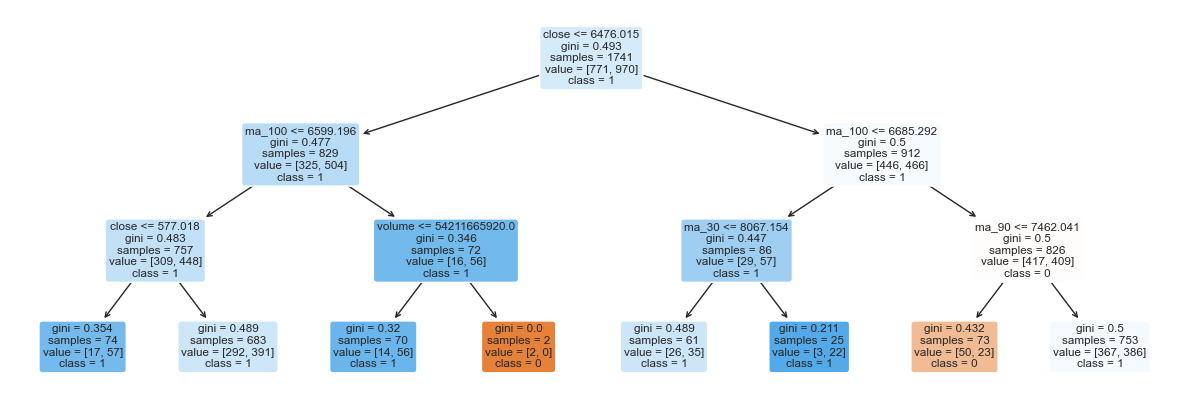

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize the decision tree model with max_depth of 3
dectree = DecisionTreeClassifier(max_depth=3, random_state=1)

# Fit the decision tree model with the train data
dectree.fit(train[predictors], train[target_col])

# Plot the decision tree
plt.figure(figsize=(15, 5))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=predictors, class_names=["0", "1"])
plt.show()

###### Linear Regression

###### Trying to predict the future values of Bitcoin prices in the next 100 days

This section is to predict the Bitcoin prices for the next 100 days. Using the Linear regression model, we split the data into train and test sets. The testing set is 20% of the data. The model is then trained based on the training data. The graph plots the historical closing price of Bitcoin over the last 500 days, excluding the last 150 days, as well as the predicted closing price of Bitcoin for the next 100 days.

In [41]:
predict_future = bitcoinData.shift(periods=50).tail(100)

features = ['open', 'high', 'low', 'volume']
output = 'close'

In [42]:
x_train, x_test, y_train, y_test = train_test_split(bitcoinData[features], bitcoinData[output], test_size = 0.2)

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [44]:
prediction = model.predict(predict_future[features])

Text(0, 0.5, '$ Price')

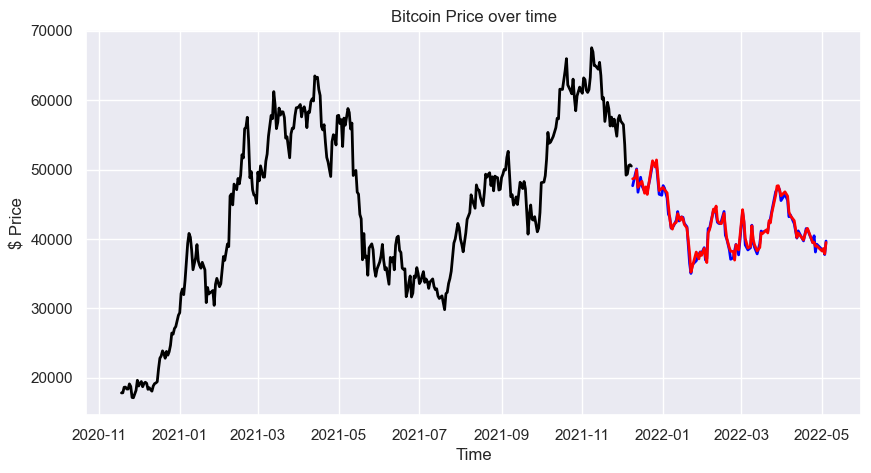

In [45]:
plt.figure(figsize = (10, 5))
plt.plot(bitcoinData["date"][-500:-150], bitcoinData["close"][-500:-150], color='black', lw=2)
plt.plot(bitcoinData["date"][-150:-50], bitcoinData["close"][-150:-50], color='blue', lw=2)
plt.plot(predict_future["date"], prediction, color='red', lw=2)
plt.title("Bitcoin Price over time", size=12)
plt.xlabel("Time", size=12)
plt.ylabel("$ Price", size=12)

###### Linear Regression Model with best fit line

In [46]:
bitcoinData["Tomorrow"] = bitcoinData["close"].shift(-1)
bitcoinData = bitcoinData.dropna(subset=["Tomorrow"]) # drop last row since there is no "Tomorrow" value for it

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score

In [48]:
model = RandomForestRegressor(n_estimators=200, min_samples_split=100, random_state=1)
bitcoinData['index'] = range(1, len(bitcoinData) + 1)

In [49]:
# Convert the date column to integers
bitcoinData['date_int'] = bitcoinData['date'].astype('int64') // 10**9

# Define the feature and target variables
X = bitcoinData[['date_int']]
y = bitcoinData['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model on the training set
reg = LinearRegression().fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = reg.predict(X_test)

# Compute the R-squared score to evaluate the performance
r2_score = reg.score(X_test, y_test)
print('R-squared score:', r2_score)

# Assuming y_test and y_pred are the actual and
#predicted values of the target variable respectively
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


R-squared score: 0.5835251371977449
Mean Squared Error: 103586773.08521338


<Axes: xlabel='date_int', ylabel='close'>

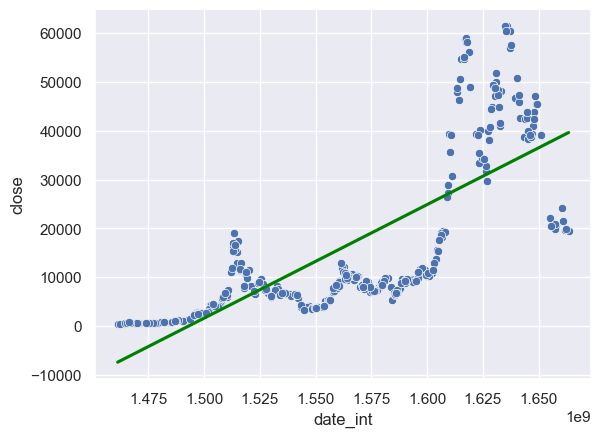

In [50]:
# Create a scatter plot of the data
sb.scatterplot(x=X_test['date_int'], y=y_test)

# Add the best fit line to the plot
sb.regplot(x=X_test['date_int'], y=y_pred, scatter=False, color="green")

###### Neural Networks

In [51]:
import os
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [52]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(bitcoinData['close'].values.reshape(-1,1))

In [53]:
prediction_days = 60

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_days, len(scaled_data)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_data[x - prediction_days:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_data[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [54]:
def LSTM_model(reg_strength=0.01):

    model = Sequential()

    # First LSTM layer with 50 units
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Batch normalization to normalize the activations of the previous layer
    model.add(BatchNormalization())
    # Dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Second LSTM layer with 50 units
    model.add(LSTM(units=50, return_sequences=True))
    # Batch normalization to normalize the activations of the previous layer
    model.add(BatchNormalization())
    # Dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Batch normalization to normalize the activations of the previous layer
    model.add(BatchNormalization())
    # Dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Dense output layer with one unit
    model.add(Dense(units=1))

    return model

In [55]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')

2023-04-22 22:55:37.673507: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 batch_normalization (BatchN  (None, 60, 50)           200       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 batch_normalization_1 (Batc  (None, 60, 50)           200       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0

In [56]:
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', verbose = 2, save_best_only = True)

# EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Train the model and use the EarlyStopping callback
model.fit(x_train, y_train, epochs=25, batch_size=32, callbacks=[checkpointer, early_stop], validation_split=0.2)

Epoch 1/25
52/53 [============================>.] - ETA: 0s - loss: 0.6297
Epoch 1: val_loss improved from inf to 0.26833, saving model to weights_best.hdf5
53/53 [==============================] - 6s 58ms/step - loss: 0.6257 - val_loss: 0.2683
Epoch 2/25
53/53 [==============================] - ETA: 0s - loss: 0.3855
Epoch 2: val_loss did not improve from 0.26833
53/53 [==============================] - 2s 45ms/step - loss: 0.3855 - val_loss: 0.2806
Epoch 3/25
53/53 [==============================] - ETA: 0s - loss: 0.2925
Epoch 3: val_loss did not improve from 0.26833
53/53 [==============================] - 2s 45ms/step - loss: 0.2925 - val_loss: 0.3723
Epoch 4/25
53/53 [==============================] - ETA: 0s - loss: 0.2702
Epoch 4: val_loss did not improve from 0.26833
53/53 [==============================] - 2s 45ms/step - loss: 0.2702 - val_loss: 0.3494
Epoch 5/25
53/53 [==============================] - ETA: 0s - loss: 0.2032
Epoch 5: val_loss did not improve from 0.26833
53/

In [57]:
Start_Date = '2019-01-01'
End_Date = '2022-10-31'
bitcoinData['date'] = pd.to_datetime(bitcoinData['date'])
bitcoinData.set_index('date', inplace=True)
test_data = bitcoinData.loc[(bitcoinData.index >= Start_Date) & (bitcoinData.index <= End_Date)]
scaled_test_data = scaler.transform(test_data['close'].values.reshape(-1, 1))

In [58]:
actual_prices = test_data['close'].values
total_dataset = pd.concat((bitcoinData['close'], test_data['close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

In [59]:
# Create a list of inputs for the LSTM model
x_test = []
for x in range(prediction_days, len(scaled_test_data)):
    x_test.append(scaled_test_data[x - prediction_days:x, 0])

# Reshape the test data into the same format as training data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate predictions on the test data
predicted_prices = model.predict(x_test)

# Invert the scaling applied to the predicted prices to obtain actual values
predicted_prices = scaler.inverse_transform(predicted_prices)

35/35 [==============================] - 1s 13ms/step


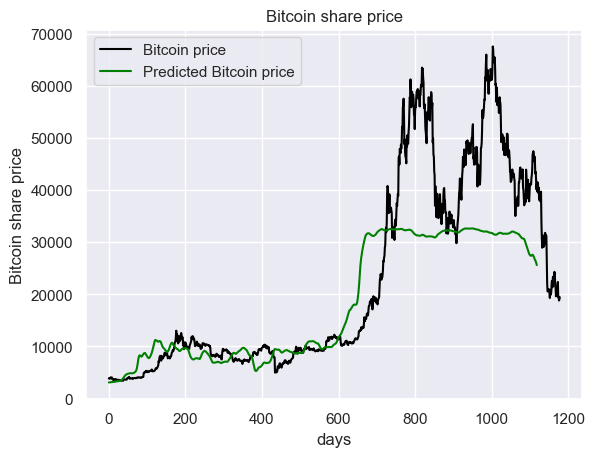

In [60]:
plt.plot(actual_prices, color='black', label="Bitcoin price")
plt.plot(predicted_prices, color='green', label=f"Predicted Bitcoin price")
plt.title("Bitcoin share price")
plt.xlabel("days")
plt.ylabel("Bitcoin share price")
plt.legend()
plt.show()

In [61]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print(f"Prediction: {prediction[0][0]}")

1/1 [==============================] - 1s 586ms/step
Prediction: 25351.357421875


In [62]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]))
actual_prices = test_data['close'][prediction_days:].values.reshape(-1,1)

mse = mean_squared_error(actual_prices, predicted_prices)
evs = explained_variance_score(actual_prices, predicted_prices)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Explained Variance Score: {evs:.4f}")

35/35 [==============================] - 0s 13ms/step
Mean Squared Error: 104211547.9444
Explained Variance Score: 0.7788
